In [1]:
import utils

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### LogisticRegression
#### titanic.csv

In [3]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

# np.random.seed(0)

In [4]:
titanic = utils.read_file_as_dataframe('titanic.csv')
X = titanic.drop('survived', axis=1)
y = titanic['survived']

titanic.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pclass       891 non-null    int64  
 1   sex          891 non-null    object 
 2   age          714 non-null    float64
 3   sibsp        891 non-null    int64  
 4   parch        891 non-null    int64  
 5   fare         891 non-null    float64
 6   embarked     889 non-null    object 
 7   class        891 non-null    object 
 8   who          891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  deck         203 non-null    object 
 11  embark_town  889 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(3), object(7)
memory usage: 85.4+ KB


In [6]:
numeric_features = ["age", "fare"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = ["embarked", "sex", "pclass"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [7]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.799


#### geyser.csv

In [8]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

In [9]:
geyser = utils.read_file_as_dataframe('geyser.csv')
# geyser
X_2 = geyser.drop('kind', axis=1)
y_2 = geyser['kind']

In [10]:
geyser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


In [11]:
encoder = LabelEncoder().fit(geyser['kind'])
geyser['kind'] = encoder.transform(geyser['kind'])
y_2 = geyser['kind']

In [12]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
numeric_features = ["duration", "waiting"]
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
    ]
)

In [13]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, test_size=0.2, random_state=0)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

model score: 0.982


### 多分类
#### iris svm

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [22]:
import numpy as np
iris = utils.read_file_as_dataframe('iris.csv')

In [23]:
iris.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]>

In [25]:
preprocessor_iris = ColumnTransformer(
    transformers=[
      ('scale', StandardScaler(),
      make_column_selector(dtype_include=np.number)),
      ('onehot',
      OneHotEncoder(),
      make_column_selector(dtype_include=object))])
# preprocessor_iris.fit_transform(iris)

In [29]:
clf_svc = Pipeline(
    [
        ("preprocessor_iris", preprocessor_iris),
        ("svc", SVC(gamma="auto")),
    ]
)
clf_decision_tree = Pipeline(
    [
        ("preprocessor_iris", preprocessor_iris),
        ("decision_tree", tree.DecisionTreeClassifier()),
    ]
)
clf_random_forest = Pipeline(
    [
        ("preprocessor_iris", preprocessor_iris),
        ("random_forest", RandomForestClassifier(max_depth=2, random_state=0)),
    ]
)
clf_gbdt = Pipeline(
    [
        ("preprocessor_iris", preprocessor_iris),
        ("GBDT", GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)),
    ]
)

In [30]:
X_3 = iris.drop('species', axis=1)
y_3 = iris['species']
X_train, X_test, y_train, y_test = train_test_split(X_3, y_3, test_size=0.4, random_state=0)

clf_svc.fit(X_train, y_train)
print("svm model score: %.3f" % clf_svc.score(X_test, y_test))
clf_decision_tree.fit(X_train, y_train)
print("decision tree model score: %.3f" % clf_decision_tree.score(X_test, y_test))
clf_random_forest.fit(X_train, y_train)
print("random forest model score: %.3f" % clf_random_forest.score(X_test, y_test))
clf_gbdt.fit(X_train, y_train)
print("gradient boosting model score: %.3f" % clf_gbdt.score(X_test, y_test))

svm model score: 0.933
decision tree model score: 0.950
random forest model score: 0.917
gradient boosting model score: 0.950


#### anscombe.csv

In [35]:
from sklearn.linear_model import LinearRegression

In [31]:
anscombe = utils.read_file_as_dataframe('anscombe.csv')
anscombe.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


In [33]:
anscombe_1 = anscombe.loc[anscombe['dataset']=='I']
anscombe_1.head(3)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58


In [41]:
X_train

10     5.0
6      6.0
1      8.0
7      4.0
8     12.0
3      9.0
0     10.0
5     14.0
Name: x, dtype: float64

In [44]:
# x should be 2d list e.g. X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression
X_4=[]
for x in anscombe['x']:
    X_4.append([x])
y_4=[]
for y in anscombe['y']:
    y_4.append([y])

X_train, X_test, y_train, y_test = train_test_split(X_4, y_4, test_size=0.2, random_state=0)
X_train = np.array(X_train).reshape(-1, 1)
clf_regression = LinearRegression()
clf_regression.fit(X_train, y_train)
print("linear regression score: %.3f" % clf_regression.score(X_test, y_test))

linear regression score: 0.473


In [47]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf_regression, X_4, y_4, cv=10)
scores

array([-1.85662013,  0.74920348,  0.31132196,  0.69053116,  0.66887857,
        0.32776284,  0.75680437,  0.11513162, -0.09875835,  0.89222008])

In [48]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.26 accuracy with a standard deviation of 0.77


### 图表

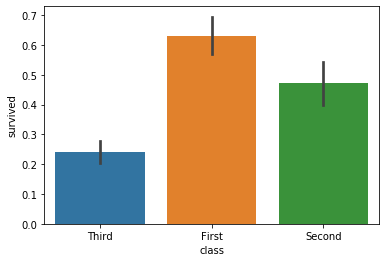

In [74]:
sns.barplot(data=titanic,x='class',y='survived')

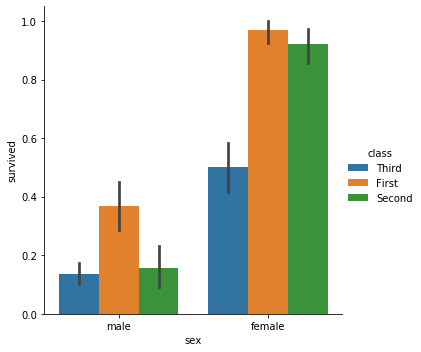

In [67]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)

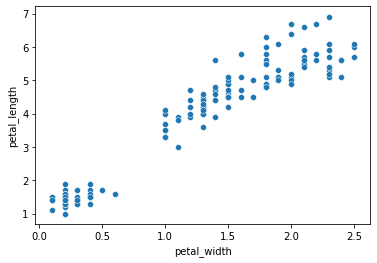

In [54]:
sns.scatterplot(data=iris,x="petal_width",y="petal_length")

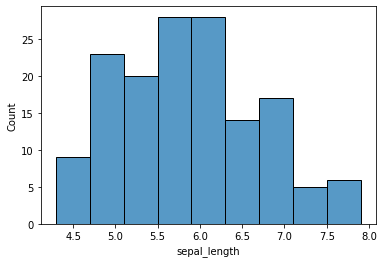

In [55]:
sns.histplot(data=iris["sepal_length"])

C:\ANACONDA3\envs\Simi_com\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ANACONDA3\envs\Simi_com\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ANACONDA3\envs\Simi_com\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ANACONDA3\envs\Simi_com\lib\site-packages\matplotlib\axes\_base.py:278: F

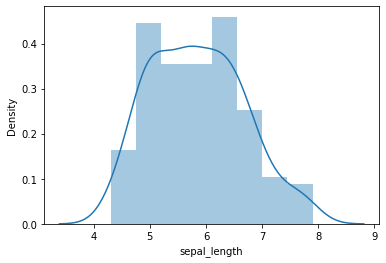

In [56]:
sns.distplot(iris["sepal_length"])

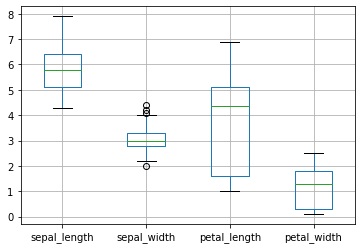

In [58]:
iris.iloc[:,0:4].boxplot()

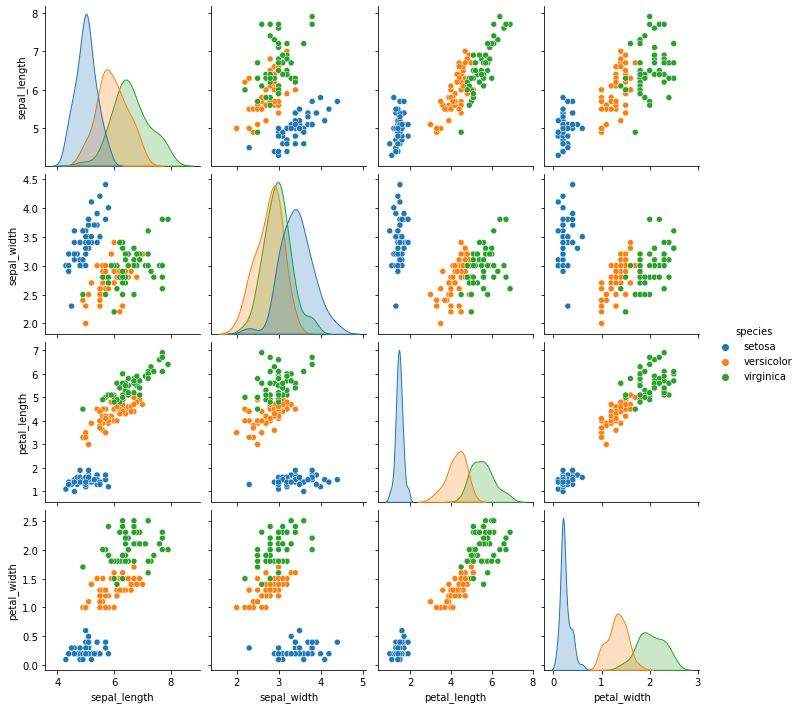

In [59]:
sns.pairplot(iris,hue="species")

In [62]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


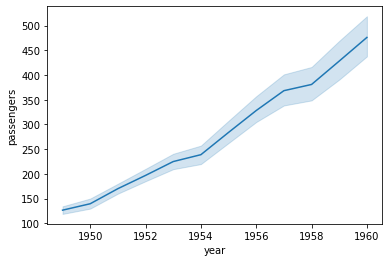

In [63]:
# may_flights = flights.query("month == 'May'")
# sns.lineplot(data=may_flights, x="year", y="passengers")
def line_plot(df,x_name,y_name):
    sns.lineplot(data=flights, x=x_name, y=y_name)
line_plot(flights,"year","passengers")

In [87]:
# type(titanic['sex'].value_counts(ascending=True))#pandas.core.series.Series
titanic_pie_data = titanic['sex'].value_counts(ascending=True)
titanic_pie_data

female    314
male      577
Name: sex, dtype: int64

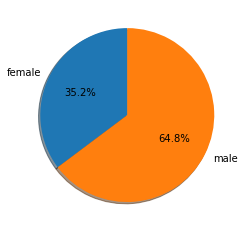

In [89]:
import matplotlib.pyplot as plt

labels = 'female','male'
fig1, ax1 = plt.subplots()
ax1.pie(titanic_pie_data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

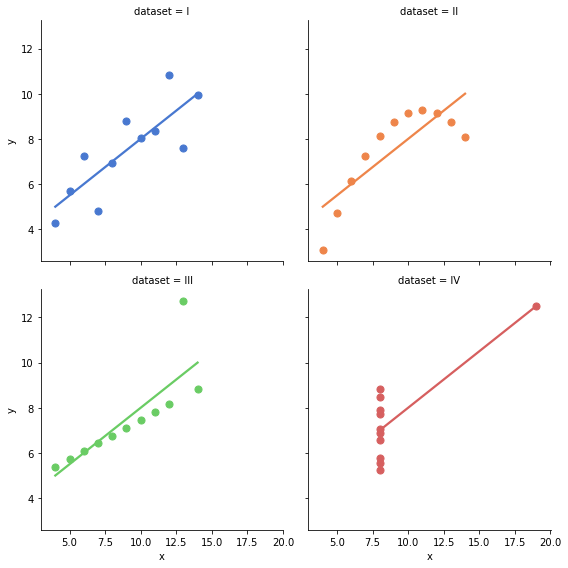

In [96]:
# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe,
           col_wrap=2, ci=None, palette="muted", height=4,
           scatter_kws={"s": 50, "alpha": 1})